### IMPORTING LIBRARIES

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, mean_absolute_error, classification_report
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,roc_curve
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the CSV File
pp_data = pd.read_csv('preprocessed_dataset/preprocessed_adult_data.csv')
pp_data

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,income
0,-1.736260,0.471409,-0.223408,-1.574084,-0.082130,1.405999,0.548487,-0.931109,-1.050371,0.175388,-1.245116,1.0
1,1.216855,-1.284226,2.974002,-1.248504,-0.394068,0.123208,-0.087515,0.102517,-1.384924,-2.450783,0.978043,-1.0
2,-0.737346,1.848231,-0.716399,-0.202399,0.368659,1.704677,2.071860,-1.543671,-0.077343,-0.284736,-1.233620,1.0
3,-1.287304,-0.355038,-0.739970,1.286938,0.111713,-0.464225,-0.211265,0.076012,0.666753,-0.333561,-0.701644,1.0
4,-1.687906,1.798186,0.489199,-1.467324,-2.019762,1.789079,0.693368,-0.935107,1.258649,-0.140906,0.995796,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
22399,-1.480808,-0.039154,0.304347,-1.330376,-0.255016,-0.050809,-0.191092,0.568263,-0.737416,0.191837,-0.517323,1.0
22400,0.042909,2.700527,-0.546795,0.282103,0.826085,-0.089762,0.158056,1.470042,-1.187734,0.515790,-0.771055,1.0
22401,-0.059760,-1.051674,-0.671729,-0.527990,-0.154844,1.174289,-1.505858,1.147759,-0.157792,0.102847,0.266465,-1.0
22402,-0.061131,-0.636539,-0.915894,0.120619,0.178478,1.015787,-1.355692,1.854557,-0.662030,0.174194,0.098275,-1.0


#### NORMALIZATION (Scaling of values - StandardScalar)

In [3]:
X = pp_data[['PCA1','PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6', 'PCA7', 'PCA8', 'PCA9', 'PCA10', 'PCA11']]
y = pp_data['income']

### TRAIN/TEST SPLIT

In [4]:
# Splitting train, test variables, where test is 20% of the dataframe.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [5]:
X_train.shape, X_test.shape

((17923, 11), (4481, 11))

In [6]:
X_train.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11
4739,0.264336,4.095595,-0.469835,1.308416,-0.858982,-0.731659,0.402763,-0.887515,0.859294,0.507106,0.452154
5163,-0.442169,-0.733561,-0.499443,0.421355,-0.291461,-1.333661,-1.066375,-0.453665,0.189715,0.331129,-0.439246
21981,-2.601585,-0.197650,0.719390,-1.019679,-0.185906,0.085865,1.606960,0.791224,-1.593767,-0.080139,0.260466
3965,-1.848772,-0.225170,0.181732,-2.025433,2.944994,-0.004080,2.482725,0.117594,1.086019,-0.747224,0.484350
12465,-1.325343,-0.061455,-0.694793,0.804789,0.453219,1.383390,1.635697,1.690979,-0.653406,-0.810286,-0.824241


### MODEL TRAINING & MODEL PERFORMANCE METRICS

### NAÏVE BAYES

In [7]:
# Creating a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
gnb = model.fit(X_train,y_train)

# Predictions on the test set
gnb_predictions = gnb.predict(X_test)

# Evaluate Naïve Bayes Classifier
print("Naïve Bayes Classifier:")
print("Accuracy:", accuracy_score(y_test, gnb_predictions))
print("Classification Report:")
print(classification_report(y_test, gnb_predictions))

Naïve Bayes Classifier:
Accuracy: 0.903592948002678
Classification Report:
              precision    recall  f1-score   support

        -1.0       0.89      0.92      0.91      2276
         1.0       0.92      0.88      0.90      2205

    accuracy                           0.90      4481
   macro avg       0.90      0.90      0.90      4481
weighted avg       0.90      0.90      0.90      4481



In [8]:
model.score(X_train, y_train)

0.8983987055738437

In [9]:
model.score(X_test, y_test)

0.903592948002678

Random Prediction: ROC AUC=0.500
Naïve Bayes: ROC AUC=0.955


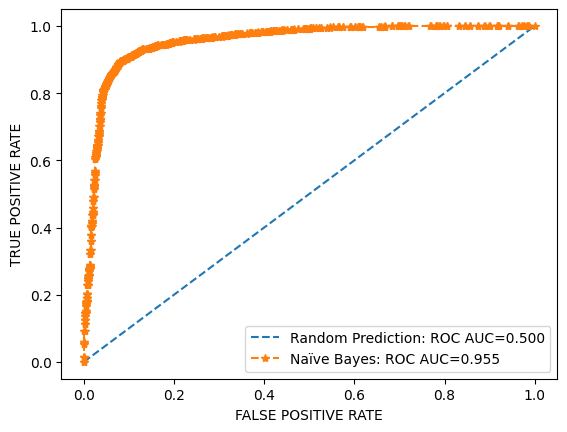

In [10]:
# Predict probabilities
nb_probs = model.predict_proba(X_test)

# Keep probabilities for the positive outcome only
nb_probs1 = nb_probs[:, 1]

ns_probs = [0 for _ in range(len(y_test))]

# Calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
nb_auc = roc_auc_score(y_test, nb_probs1)

# Summarize scores
print('Random Prediction: ROC AUC=%.3f' % (ns_auc))
print('Naïve Bayes: ROC AUC=%.3f' % (nb_auc))

# Calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs1)

# Plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Prediction: ROC AUC=%.3f' % (ns_auc))
plt.plot(nb_fpr, nb_tpr, linestyle='--',marker='*',label='Naïve Bayes: ROC AUC=%.3f' % (nb_auc))
plt.xlabel('FALSE POSITIVE RATE')
plt.ylabel('TRUE POSITIVE RATE')
plt.legend()
plt.show()


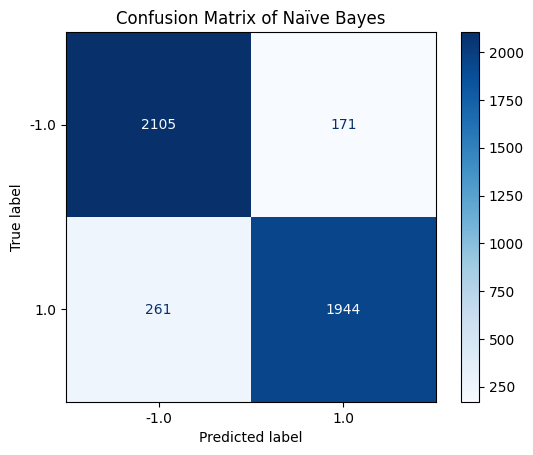

In [11]:
# Display the confusion matrix
cm = confusion_matrix(y_test, gnb_predictions, labels=gnb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gnb.classes_)

disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix of Naïve Bayes")
plt.show()

### RANDOM FOREST

In [39]:
# Define the parameter grid to search
param_grid = {
    'n_estimators': [70, 80],
    'max_depth': [8, 10], 
    'min_samples_split': [11, 12],
    'min_samples_leaf': [9, 10] 
}

# Initialize the classifier
random= RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=random, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Use the best estimator to make predictions
y_pred = grid_search.best_estimator_.predict(X_test)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 9, 'min_samples_split': 11, 'n_estimators': 70}
Best Score: 0.9496176691278199


In [40]:
# Evaluate Naïve Bayes Classifier
print("Random Forest Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Random Forest Classifier:
Accuracy: 0.9546976121401473
Classification Report:
              precision    recall  f1-score   support

        -1.0       0.95      0.96      0.96      2276
         1.0       0.96      0.95      0.95      2205

    accuracy                           0.95      4481
   macro avg       0.95      0.95      0.95      4481
weighted avg       0.95      0.95      0.95      4481



In [41]:
grid_search.score(X_train, y_train)

0.9669140210902193

In [42]:
grid_search.score(X_test, y_test)

0.9546976121401473

Random Prediction: ROC AUC=0.500
Random Forest: ROC AUC=0.992


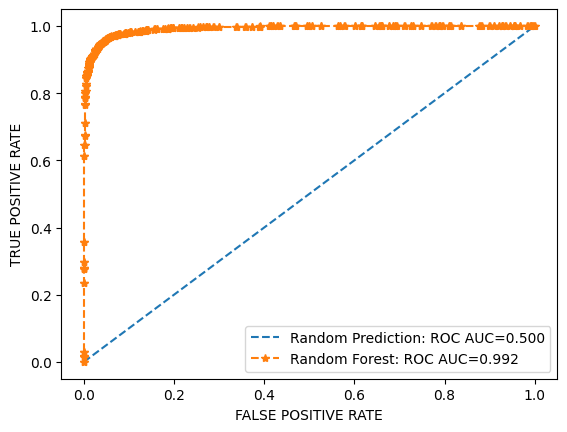

In [43]:
# Predict probabilities
rf_probs = grid_search.predict_proba(X_test)
# Keep probabilities for the positive outcome only
rf_probs1 = rf_probs[:, 1]

ns_probs = [0 for _ in range(len(y_test))]

# Calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
rf_auc = roc_auc_score(y_test, rf_probs1)

# Summarize scores
print('Random Prediction: ROC AUC=%.3f' % (ns_auc))
print('Random Forest: ROC AUC=%.3f' % (rf_auc))

# Calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs1)

# Plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Prediction: ROC AUC=%.3f' % (ns_auc))
plt.plot(rf_fpr, rf_tpr, linestyle='--',marker='*',label='Random Forest: ROC AUC=%.3f' % (rf_auc))
plt.xlabel('FALSE POSITIVE RATE')
plt.ylabel('TRUE POSITIVE RATE')
plt.legend()
plt.show()

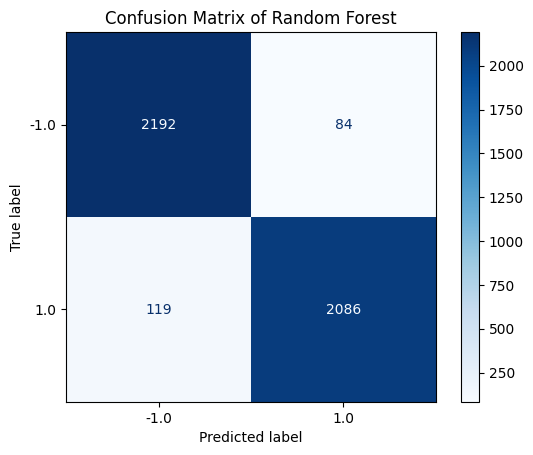

In [44]:
# Display the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=grid_search.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_search.classes_)

disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix of Random Forest")
plt.show()

### COMPARING THE TWO MODELS

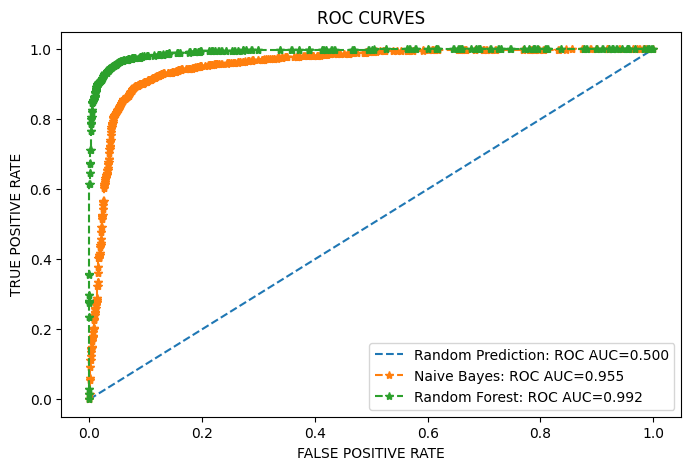

In [45]:
plt.figure(figsize=(8,5))
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Prediction: ROC AUC=%.3f' % (ns_auc))
plt.plot(nb_fpr, nb_tpr, linestyle='--',marker='*',label='Naive Bayes: ROC AUC=%.3f' % (nb_auc))
plt.plot(rf_fpr, rf_tpr, linestyle='--',marker='*',label='Random Forest: ROC AUC=%.3f' % (rf_auc))

plt.xlabel('FALSE POSITIVE RATE')
plt.ylabel('TRUE POSITIVE RATE')
plt.title('ROC CURVES')
plt.legend()
plt.show()

In [46]:
random_forest_accuracy = grid_search.score(X_test, y_test)
naïve_bayes_accuracy = model.score(X_test, y_test)

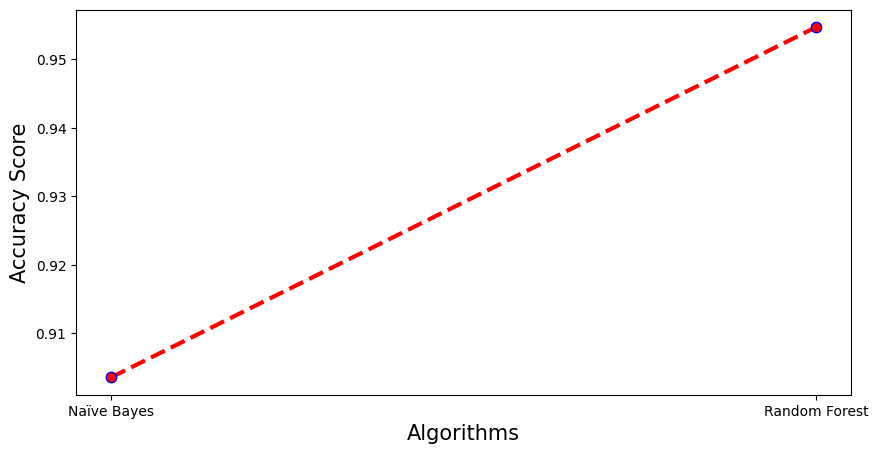

In [47]:
# Comparing Different algorithm models with their respective accuracy.
x=['Naïve Bayes','Random Forest']
y=[naïve_bayes_accuracy, random_forest_accuracy]

plt.figure(1,figsize=(10,5))

plt.plot(x,y,label='line width is 5x',linewidth=3,linestyle="--",color="red",marker='.',markersize=15,markeredgecolor="blue")
plt.xlabel("Algorithms",fontsize=15)
plt.ylabel("Accuracy Score",fontsize=15)

plt.show() 